## Applications - Statistical Modeling: Regression

This lecture provides foundational knowledge and examples of machine learning modeling concepts by examining stock price data.  Here we are focusing mostly on regression models.

---

# Table of Contents

### Jupyter Overview
#### <a href='#1'>Introduction</a>
* Classification
* Regression

#### <a href='#2'>Data Sources</a>
#### <a href='#3'>What is scikit-learn (sklearn)</a>
#### <a href='#4'>What is Regression?</a>
#### <a href='#5'>Create Our Functions</a>
* Split our data into train/test
* Use Statsmodel API functions to build a simple Regression model
* Use Sklearn to create Lasso Regression model

#### <a href='#6'>Linear Regression Model</a>
#### <a href='#7'>Lasso Regression Model</a>
#### <a href='#8'>Multicollinearity</a>
#### <a href='#9'>Regression Models Take 2</a>
#### <a href='#40'>Interpretation and Overfitting</a>
#### <a href='#10'>Collinearity Check 2</a>
------------------------------------------------------------------------
#### <a href='#11'>Advanced Regression Machine Learning Models</a>
#### <a href='#12'>Save Modified Dataset</a>
#### <a href='#55'>Weekly Readings/Videos</a>
#### <a href='#56'>Extra Practice</a>

<a id='1'></a>
## Introduction

### Predictive machine learning models perform two types of tasks:

* __CLASSIFICATION__:

LABELS ARE DISCRETE VALUES.

Here the model is trained to classify each instance into a set of predefined  discrete classes.
On inputting a feature vector into the model, the trained model is able to predict a  class of that instance.

Eg: We train our model using income and expenditure data of bank customers using  __defaulter or non-defaulter__ as labels. When we input income and expenditure data  of any customer in this model, it will predict whether the customer is going to default or not.

* __REGRESSION__:

LABELS ARE CONTINUOUS VALUES.

Here the model is trained to predict a continuous value for each instance.
On inputting a feature vector into the model, the trained model is able to predict a continuous value  for  that instance.

Eg: We train our model using income and expenditure data of bank customers using  __default amount__ as the label. This model when input with income and expenditure data of any customer will be able to predict the default amount the customer might end up with.


<code style="background:yellow;color:black">...We are focusing today on regression models...</code>

<a id='2'></a>
## Data Sources

1. SP 500 Components: https://datahub.io/core/s-and-p-500-companies
2. SP 500 Company Info: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies
3. TD Ameritrade Data Dicitionary https://developer.tdameritrade.com/content/streaming-data#_Toc504640567
4. Yahoo Finance: https://finance.yahoo.com/quote/%5EGSPC?p=%5EGSPC
5. Weather: https://www.weather.gov/wrh/climate?wfo=okx
6. FRED https://fred.stlouisfed.org/docs/api/fred/series.html

In [1]:
import requests
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import statsmodels.api as sm
import sklearn
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

warnings.filterwarnings('ignore')

<a id='3'></a>
## What is scikit-learn (sklearn)?

* Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python

* This library is built upon SciPy (Scientific Python) another package you can load in

* The library is focused on modeling data. It is not focused on loading, manipulating and summarizing data -> use pandas for that!

* We can do supervised and unsupervised learning with Scikit-learn

* Train and test splits made easy with their pre-made function

In [2]:
# Load in data we created in the Data Cleaning notebook

yahoo_data=pd.read_csv('Data/yahoo_data.csv', index_col=0)
yahoo_data

,open,close,prec,temp,DFF,UNRATE,GDPC1,Over65Degrees,volume_moving,volume_moving_std,close_moving,close_moving_std,volume_slope,close_slope,close_future
252,0.000000,78.930000,2.57,43.1,3.50,5.4,3853.835,0,4.776786e+06,9.023107e+05,72.497183,3.248691,3.325118e+03,0.041907,86.930000
253,0.000000,78.790001,2.57,43.1,3.38,5.4,3853.835,0,4.783611e+06,8.969772e+05,72.549087,3.246555,3.192804e+03,0.041882,87.089996
254,0.000000,78.980003,2.57,43.1,3.38,5.4,3853.835,0,4.789127e+06,8.953003e+05,72.599087,3.245255,3.141524e+03,0.041866,86.839996
255,0.000000,79.190002,2.57,43.1,3.50,5.4,3853.835,0,4.795952e+06,8.935187e+05,72.649762,3.244793,3.097581e+03,0.041861,86.199997
256,0.000000,79.139999,2.57,43.1,3.50,5.4,3853.835,0,4.802540e+06,8.944859e+05,72.700516,3.246675,3.122290e+03,0.041883,86.029999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14477,3226.139893,3246.590088,3.94,68.8,0.09,7.8,18560.774,1,4.650244e+09,1.464733e+09,3092.189362,246.356374,6.489758e+06,0.868322,4455.479980
14478,3236.659912,3298.459961,3.94,68.8,0.09,7.8,18560.774,1,4.655326e+09,1.462315e+09,3093.227933,246.453794,6.358687e+06,0.872673,4443.109863
14479,3333.899902,3351.600098,3.94,68.8,0.09,7.8,18560.774,1,4.658163e+09,1.459933e+09,3094.501107,246.682806,6.127766e+06,0.881020,4352.629883
14480,3350.919922,3335.469971,3.94,68.8,0.09,7.8,18560.774,1,4.660950e+09,1.457891e+09,3096.047973,247.069186,5.926572e+06,0.892627,4359.459961


In [3]:
# Correlation between close and open
print("Correlation between close and open:",yahoo_data['close'].corr(yahoo_data['open']))

# Save the data in these columns for later use
close_data=yahoo_data['close']
close_future_data=yahoo_data['close_future']

# Drop the column 'close' since it's well correlated with 'open'
yahoo_data.drop(columns=['close'],inplace=True)

# Summary statistics, rounded to 2 decimals places
yahoo_data.describe().round(2)

Correlation between close and open: 0.998844140625385


,open,prec,temp,DFF,UNRATE,GDPC1,Over65Degrees,volume_moving,volume_moving_std,close_moving,close_moving_std,volume_slope,close_slope,close_future
count,14230.00,14230.00,14230.00,14230.00,14230.00,14230.00,14230.00,1.423000e+04,1.423000e+04,14230.00,14230.00,14230.00,14230.00,14230.00
mean,744.36,4.12,55.56,5.10,6.02,10606.67,0.36,1.209217e+09,2.472539e+08,748.45,41.98,351576.28,0.21,845.17
std,821.25,2.38,15.72,3.78,1.73,4602.31,0.48,1.633042e+09,3.661843e+08,761.57,45.37,2291840.42,0.61,896.68
min,0.00,0.18,22.00,0.04,3.40,3853.84,0.00,4.776786e+06,6.985104e+05,72.50,1.73,-12363322.09,-3.12,62.28
25%,0.00,2.42,41.10,1.96,4.70,6578.60,0.00,2.364559e+07,6.834763e+06,103.22,5.94,-10481.64,-0.01,108.95
50%,414.96,3.71,55.50,5.07,5.70,9739.18,0.00,1.904109e+08,4.193060e+07,398.82,21.03,27893.58,0.09,447.98
75%,1256.61,5.26,70.70,6.97,7.20,15216.65,1.00,2.260477e+09,3.517212e+08,1232.32,72.61,382156.46,0.48,1288.06
max,3564.74,18.95,81.40,22.36,14.80,19202.31,1.00,6.093193e+09,1.607984e+09,3097.47,247.41,14099845.55,2.02,4536.95


In [4]:
# Look into the dataset characteristics, check for feature type - categorical or numerical.
yahoo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14230 entries, 252 to 14481
Data columns (total 14 columns):
open                 14230 non-null float64
prec                 14230 non-null float64
temp                 14230 non-null float64
DFF                  14230 non-null float64
UNRATE               14230 non-null float64
GDPC1                14230 non-null float64
Over65Degrees        14230 non-null int64
volume_moving        14230 non-null float64
volume_moving_std    14230 non-null float64
close_moving         14230 non-null float64
close_moving_std     14230 non-null float64
volume_slope         14230 non-null float64
close_slope          14230 non-null float64
close_future         14230 non-null float64
dtypes: float64(13), int64(1)
memory usage: 1.6 MB


<a id='4'></a>
## What is Regression?

https://www.youtube.com/watch?v=iIUq0SqBSH0

__Linear regression__ is a predictive modeling technique for predicting a numeric response variable based on features.  In short - how do variables X1, X2,...,Xn affect Y and by how much?

"Linear" in the name linear regression refers to the fact that this method fits a model where response bears linear relationship with features. (ie Y is proportional to first power of X)  

The coefficients b1,b2,...,bn refer to how much the variable they are connected to impacts Y.  

__Y^ = b0 + b1(X1) + b2(X2) +.... + bn(Xn) where:__   
Y^: predicted response  
b0: the y intercept  
b1,b2,...,bn: Coefficients of X1,X2,...,Xn 

![image.png](https://knowledge.dataiku.com/latest/_images/simple-linear-regression1.png)
![image.png](https://knowledge.dataiku.com/latest/_images/simple-linear-regression2.png)
![image.png](https://knowledge.dataiku.com/latest/_images/simple-linear-regression4.png)
source: https://knowledge.dataiku.com/latest/courses/intro-to-ml/regression/regression-summary.html

If Y is the actual response and Y^ is the predicted response,    
__Y-Y^= Residual__  
Average Residual defines model performance... if the residual equal to zero represents a perfect fit model (no difference between actual and predicted).

<a id='5'></a>
## Create Our Functions

### Split our data into train/test

In order to check the validity of our trained model, we keep a part of our dataset hidden from the model during training, called  __Test set__.

Test data labels are predicted using the trained model and compared with the actual labels of the data. This gives us the idea about how well the model can be trusted for its predictive power.

* __Training set__ : The sample of data used to fit your model.

* __Test set__ : The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset. 

![image.png](Images/test_train.png)

### Use Statsmodel API functions to build a simple Regression model
Sklearn also has a package that allows creation of a Regression model but does not have a nice summary results output.

### Use Sklearn to create Lasso Regression model
This creates a regularized version of a simple Regression model.

In [5]:
def data_split(df,y_var,scale=False, randomized=False):
    """This function splits our data into a training and test set as well as returns the columns for use
    in other functions.  The scale variable is defaulted to false but can be changed if we need to normalize
    the data.  Randomized defaults to False, which controls whether or not the training data is split by using the
    first 80% of rows as training data (False) or completely randomized (True)."""
    reg_df=df.copy(drop=True)
    reg_df=reg_df.reset_index()
    
    # train test split -> This is the usual way,  however not what we are using in this lecture's example.
    if randomized == True:
        y=reg_df.pop(y_var)
        X=reg_df
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)
    
    # first 80% of the rows goes to training, the last 20% for testing.  Not randomized!
    # Helfpul to avoid "Look Ahead Bias"
    else:
        x_train = reg_df.head(int(len(reg_df)*(0.8)))
        x_test = reg_df.iloc[max(x_train.index):]
        y_train = x_train.pop(y_var)
        y_test = x_test.pop(y_var)
    
    colz=x_train.columns
    
    # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
    # Normalizes the features i.e. each column of X, INDIVIDUALLY, so that 
    # each column/feature/variable will have μ (the mean) = 0 and σ (the standard deviation) = 1.
    if scale:
        scaler = StandardScaler()
        scaler.fit(x_train)
        x_train = scaler.transform(x_train)
        x_test = scaler.transform(x_test)
        
    return x_train, x_test, y_train, y_test, colz

def regression(x_train, x_test, y_train, y_test, colz):

    print("Number of training records:", len(y_train))
    print("Number of testing records:",len(y_test))

    print('\nLinear Regression Results')
    X2 = sm.add_constant(x_train)
    est = sm.OLS(y_train, x_train)
    regr = est.fit()
    print(regr.summary())
    
    y_pred = regr.predict(x_test)
    test_acc=r2_score(y_test, y_pred)
    print('\nTest accuracy =',test_acc)
    
    
def lasso(x_train, x_test, y_train, y_test, colz, lambda_co=1, printer=True):
    lasso = linear_model.Lasso(alpha=lambda_co)
    lasso.fit(x_train, y_train)
    y_pred = lasso.predict(x_test)
    train_acc = lasso.score(x_train, y_train)
    test_acc = lasso.score(x_test, y_test)
    
    if printer:
        # The coefficients
        print('\nCoefficients:')
        for x,y in zip(colz,lasso.coef_):
            print(x,y)
        print('\n')
    
    print('Lasso Regression Results:')
    print('Training acuracy =',train_acc)
    print('Test accuracy =',test_acc)

In [6]:
# Split data using yahoo_data
x_train, x_test, y_train, y_test, colz = data_split(yahoo_data,'close_future')

<a id='6'></a>
## Linear Regression Model
![FunnyReg](https://memegenerator.net/img/instances/49880835.jpg)

In [7]:
# Fit model with known training data to best prepare your model for unknown data.
# Calculate training error, this gives you the idea of bias in your model.

# Note the multicollinearity issue at the bottom!!!!
regression(x_train, x_test, y_train, y_test, colz)

Number of training records: 11384
Number of testing records: 2595

Linear Regression Results
                                 OLS Regression Results                                
Dep. Variable:           close_future   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                          4.088e+04
Date:                Fri, 08 Apr 2022   Prob (F-statistic):                        0.00
Time:                        23:05:59   Log-Likelihood:                         -68406.
No. Observations:               11384   AIC:                                  1.368e+05
Df Residuals:                   11371   BIC:                                  1.369e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                        coe

<a id='7'></a>
## Lasso Regression Model

https://www.youtube.com/watch?v=qU1_cj4LfLY

Lasso (Least Absolute Shrinkage and Selection Operator) Regression not only uses the fundamental concept of Linear Regression which involves properly tuned selection of weights that improve the reliability of a prediction, but also has another constraint to abide.  It uses the L1 norm.

![image.png](https://miro.medium.com/max/1400/1*9HafC8pwsP6o1GmPc1szcQ.png)

We see the introduction of a new parameter λ (lambda). The value of λ controls the degree of regularization. A high value of λ means higher degree of regularization; simpler model; more weights having the value equal to zero. The case where λ=0, the Lasso model becomes equivalent to the simple linear model. Default value of λ is 1. λ is referred as alpha in sklearn linear models.

source: https://medium.com/analytics-vidhya/lasso-and-ridge-the-regularized-linear-regression-2d85384badf3

In [8]:
# Fit model with known training data to best prepare your model for unknown data.
# Calculate training error, this gives you the idea of bias in your model.

# Test out different lambda coefficients below first then print out the results from the best fit.
for l in [0.5,1,949,1000]:
    print('Lambda at',l)
    lasso(x_train, x_test, y_train, y_test, colz, lambda_co=l, printer=False)
    print('\n')
print('--------------------------------')

# Note the 0ed out columns below!!!
print('Lambda at 949:')
lasso(x_train, x_test, y_train, y_test, colz, lambda_co=949)

Lambda at 0.5
Lasso Regression Results:
Training acuracy = 0.9560274232253051
Test accuracy = -0.2888123329432122


Lambda at 1
Lasso Regression Results:
Training acuracy = 0.9559714218259593
Test accuracy = -0.30321528459504554


Lambda at 949
Lasso Regression Results:
Training acuracy = 0.9341223827840422
Test accuracy = 0.3640022584985285


Lambda at 1000
Lasso Regression Results:
Training acuracy = 0.9335172796142686
Test accuracy = 0.36989282524967426


--------------------------------
Lambda at 949:

Coefficients:
open 0.7098809372598551
prec 0.0
temp -0.0
DFF -0.0
UNRATE -0.0
GDPC1 0.03179837948908546
Over65Degrees -0.0
volume_moving 2.619855727400409e-08
volume_moving_std -2.562694281103468e-07
close_moving 0.0
close_moving_std 0.07185997301234982
volume_slope 8.262144928787018e-06
close_slope 0.0


Lasso Regression Results:
Training acuracy = 0.9341223827840422
Test accuracy = 0.3640022584985285


<a id='8'></a>
## Multicollinearity

Multicollinearity is when more than two explanatory variables in a regression model are highly linearly related.  Basically this means that two variables basically are very similiar and explain the same thing.  This causes problems when intepreting the model and breaks a basic assumption of any type of linear regression.

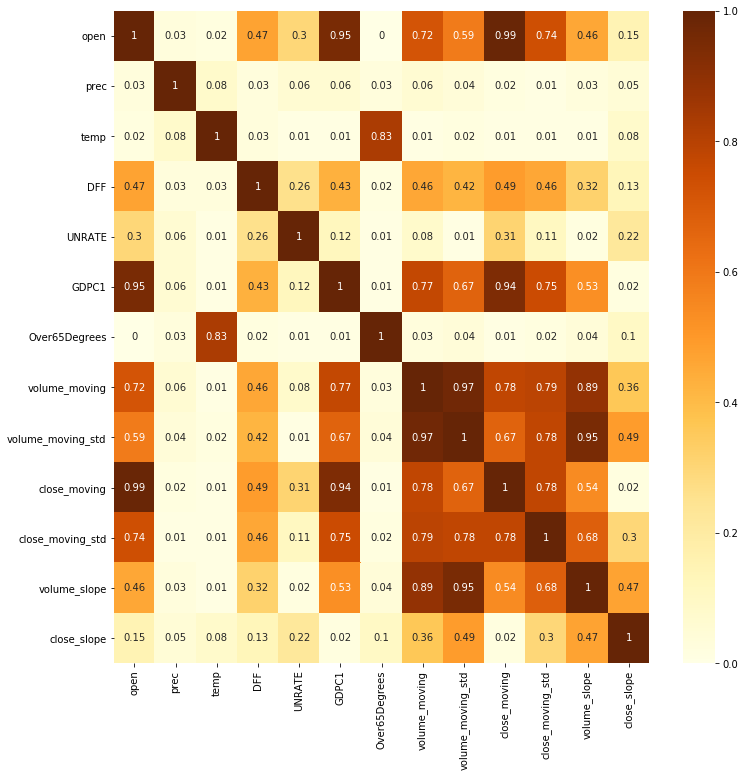

In [9]:
plt.figure(figsize=(12, 12))
corr = x_train.corr().round(2).abs()
sb.heatmap(corr, cmap="YlOrBr", annot=True)

In [10]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8 to drop
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print("Dropping these columns:",to_drop)

# Drop features 
yahoo_data2=yahoo_data.drop(to_drop, axis=1)

Dropping these columns: ['GDPC1', 'Over65Degrees', 'volume_moving_std', 'close_moving', 'volume_slope']


<a id='9'></a>
## Regression Models Take 2

In [11]:
# Resplit the data, this time using yahoo_data2
x_train, x_test, y_train, y_test, colz = data_split(yahoo_data2,'close_future')

# Run Regression model again on the new split data
regression(x_train, x_test, y_train, y_test, colz)

Number of training records: 11384
Number of testing records: 2595

Linear Regression Results
                                 OLS Regression Results                                
Dep. Variable:           close_future   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                          5.080e+04
Date:                Fri, 08 Apr 2022   Prob (F-statistic):                        0.00
Time:                        23:06:02   Log-Likelihood:                         -69900.
No. Observations:               11384   AIC:                                  1.398e+05
Df Residuals:                   11376   BIC:                                  1.399e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                       coef

<a id='40'></a>
## Interpretation and Overfitting

### R-Squared

The R-Squared statistic provides information on how well our model's data predicts our dependent variable.  The Adjusted R-Squared is a version of R-Squared which penalizes the use of additional variables.

In our model in the code block above, we can explain 97.3% of our variation in the future closing price (close_future) - the y-variable/dependent variable - by the predictive variables of our model (open, prec, temp, DFF, UNRATE, volume_moving, close_moving_std, close_slope) - the x-variables/independent variables -.

![img](https://miro.medium.com/max/2000/1*N1-K-A43_98pYZ27fnupDA.jpeg)
source: https://towardsdatascience.com/linear-regression-explained-1b36f97b7572

### Significant Variables

![img](https://i.pinimg.com/originals/b4/9d/65/b49d650a9513f126f744d666e095d104.png)

Null Hypthoses (H0): None of our variables have any signficant impact on our model.  We should assume that their "true" coefficient in our model is 0, unless given significant evidence to overturn this.

Alternative Hypothesis (Ha): If any variables have a P>|t| (the p-value) that is less than or equal to 0.05, then we can assume that their coefficient (coef in the regression output) can be used as their actual impact on the dependent variable.  Remember that a p-value measures the probability of obtaining the observed results, assuming that the null hypothesis is true.

![img](https://www.gigacalculator.com/articles/wp-content/uploads/2020/12/p-value-significance-level-explained.png)

In our model in the code block above, all of our variables are signicant since each of their p-values are equal to 0.00, which is well below 0.05.  Because of this, we now have enough evidence to reject our null hypothesis that each of their true coefficients aren't equal to 0 and can use the coefficient associated with them in the output.  However, say we had another variable called x_var2 which had a coefficient of 10.5 and a P>|t| of 0.41.  If that were the case, we could not reject our null hypothesis that the true coefficient of x_var2 is 0 and must assume that x_var2 does not have any impact on our dependent variable, close_future.  

![img](https://miro.medium.com/max/1400/1*13m_eIODa1oUXK743FKRGA.png)

### Significant Variable Coefficients

Once we determine that a variable is significant, we can interpret the coefficient.  The coefficient is the average change in the dependent (y) variable in the case of a one unit increase in the variable of interest, holding all other variables at the same value.  Important to note is the sign of the coefficient as well - a positive sign for a coefficient means that as the x variable of interest goes up, so does the y variable.  The actual value provides the level of impact.  When evaluating the model, stop and think - does the sign and impact of the model make sense?

In our model in the code block above, we can interpret that a one unit increase (one dollar) in today's open price, leads to (on average, holding all other variables equal) a 0.7796 unit increase (~78 cents) in the predictive variable - the future closing price (close_future).  This means that if today's open price goes up, that we would expect that the future closing price goes up as well, which makes sense.

### Overfitting

Overfitting occurs when a statistical model is too attuned and fits too tightly to its training data to a degree that's detrimental towards generalization. This happens when the model memorizes the noise, outliers, and specifics that belong to the training data.  A great way to test this is by checking if the model's training and testing accuracies are close in value.  A model with a much higher training accuracy than testing accuracy gives strong evidence of overfitting to training data.

In our model in the code block above, the difference between our training accuracy (.973) is much different than our testing accuracy (.636), implying that our model has serious issues with overfitting to our training data.

![img](https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/1200px-Overfitting.svg.png)

In [12]:
# Fit model with known training data to best prepare your model for unknown data.
# Calculate training error, this gives you the idea of bias in your model.

for l in [0.5,1,949,1000]:
    print('Lambda at',l)
    lasso(x_train, x_test, y_train, y_test, colz, lambda_co=l, printer=False)
    print('\n')
print('--------------------------------')
print('Lambda at 949:')
lasso(x_train, x_test, y_train, y_test, colz, lambda_co=949)

Lambda at 0.5
Lasso Regression Results:
Training acuracy = 0.9447011862997958
Test accuracy = 0.6014395711652123


Lambda at 1
Lasso Regression Results:
Training acuracy = 0.9446693994916816
Test accuracy = 0.5999483594288579


Lambda at 949
Lasso Regression Results:
Training acuracy = 0.9303182169492247
Test accuracy = 0.6198860927429954


Lambda at 1000
Lasso Regression Results:
Training acuracy = 0.9303144542675787
Test accuracy = 0.6195258332038642


--------------------------------
Lambda at 949:

Coefficients:
open 0.9121994783373668
prec 0.0
temp -0.0
DFF -0.0
UNRATE -0.0
volume_moving -4.102749501213158e-09
close_moving_std 0.0
close_slope 0.0


Lasso Regression Results:
Training acuracy = 0.9303182169492247
Test accuracy = 0.6198860927429954


<a id='10'></a>
## Collinearity Check 2

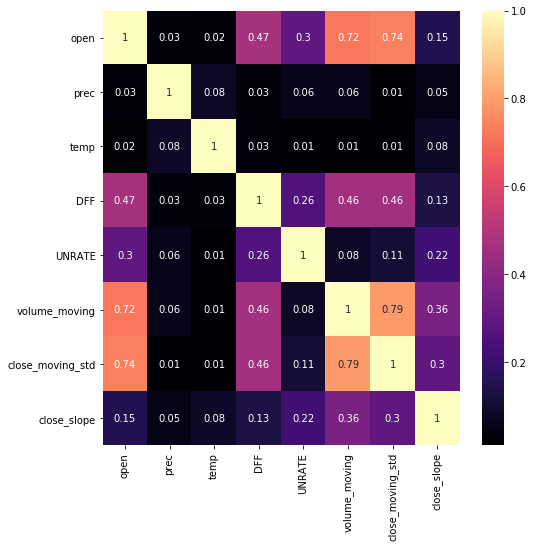

In [13]:
plt.figure(figsize=(8, 8))
corr = x_train.corr().round(2).abs()
sb.heatmap(corr, cmap="magma", annot=True)

In [14]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Dropping these columns:",to_drop)

Dropping these columns: []


<a id='11'></a>
## Advanced Regression Machine Learning Models

The information below here is solely for your own use as a code template.  

In [15]:
def random_forest(x_train, x_test, y_train, y_test, colz, cat=False, est=10):
    # If continous y variable
    random_forest = RandomForestRegressor(n_estimators=est)
    
    # If categorical y variable
    if cat:
        random_forest = RandomForestClassifier(n_estimators=est)
    
    random_forest.fit(x_train, y_train)
    train_acc = random_forest.score(x_train, y_train)
    test_acc = random_forest.score(x_test, y_test)
    
    y_pred = random_forest.predict(x_test)
    
    print('Random Forest Results:')
    
    print('Training acuracy= ',train_acc)
    print('Test accuracy= ',test_acc)

    features = x_train.columns
    importances = random_forest.feature_importances_
    indices = np.argsort(importances)

    plt.subplots(figsize=(15, 11))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

def cart(x_train, x_test, y_train, y_test, colz, cat=False):
    # if continuous variable
    cart = DecisionTreeRegressor(random_state=12)
    if cat:
        cart = DecisionTreeClassifier(random_state=12)
    cart.fit(x_train, y_train)
    train_acc = cart.score(x_train, y_train)
    test_acc = cart.score(x_test, y_test)
    
    y_pred = cart.predict(x_test)
    
    print('CART Results:')
    
    print('CART training acuracy= ',train_acc)
    print('CART test accuracy= ',test_acc)

Random Forest Results:
Training acuracy=  0.9998972070237483
Test accuracy=  -3.141568158290113


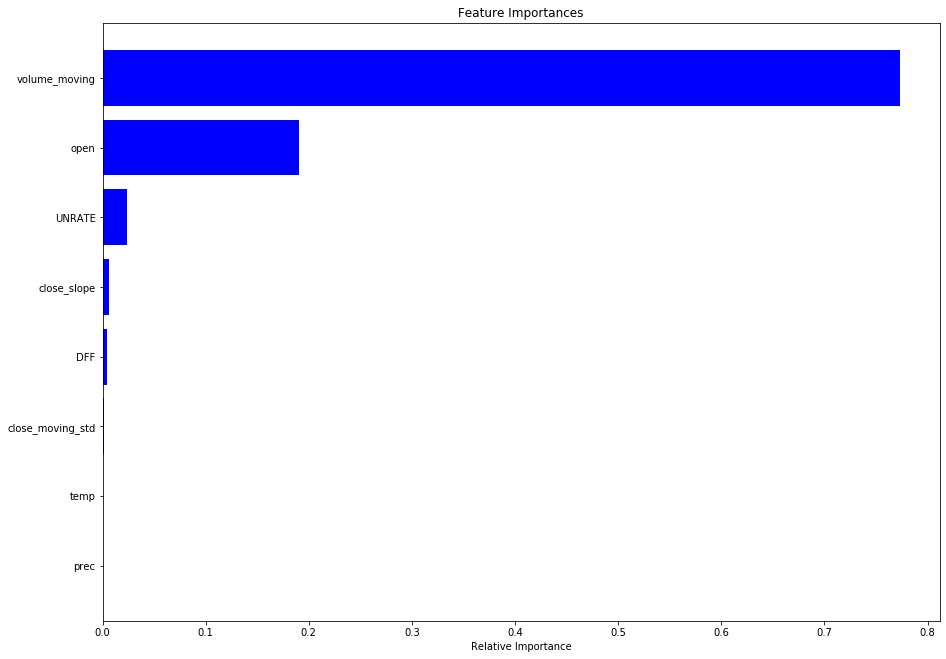

In [16]:
random_forest(x_train, x_test, y_train, y_test, colz)

In [17]:
cart(x_train, x_test, y_train, y_test, colz)

CART Results:
CART training acuracy=  1.0
CART test accuracy=  -3.095202850027454


<a id='12'></a>
## Save Modified Dataset

In [18]:
yahoo_data2['close']=close_data
yahoo_data2['close_future']=close_future_data
yahoo_data2.to_excel('Data/yahoo_data2.xlsx')

<a id='55'></a>
# Weekly Readings/Videos

https://techhq.com/2021/09/next-looks-can-ai-technology-predict-the-future-of-fashion/

https://radiichina.com/an-ai-designer-just-won-runner-up-in-a-major-fashion-design-competition/

https://data-flair.training/blogs/data-science-at-netflix/

<a id='56'></a>
# Extra Practice